In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/customer_support_tickets.csv')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [5]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [6]:
missing_rating = df[df['Customer Satisfaction Rating'].isnull()]
print(missing_rating['Ticket Status'].value_counts())

Ticket Status
Pending Customer Response    2881
Open                         2819
Name: count, dtype: int64


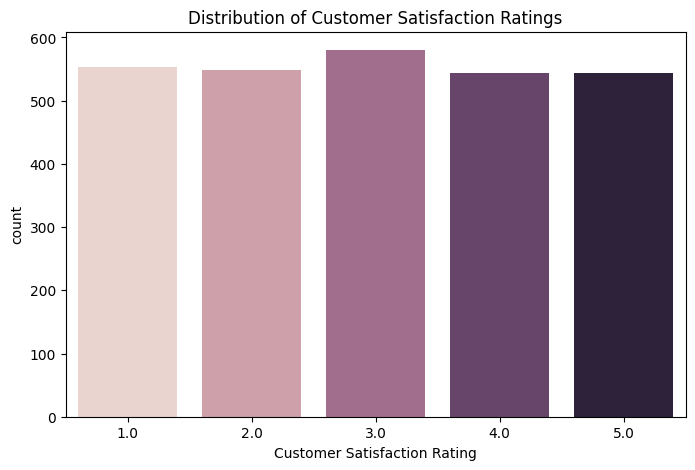

In [11]:
rated_df = df.dropna(subset=['Customer Satisfaction Rating'])
plt.figure(figsize=(8, 5))
sns.countplot(data=rated_df, x='Customer Satisfaction Rating',hue='Customer Satisfaction Rating',legend=False)
plt.title('Distribution of Customer Satisfaction Ratings')
plt.show()

INSIGHTS :-
1. Dataset size is 8469 Records.
2. Out of 8469 generated tickets only 2769 have `Customer Satisfaction Rating`. 
3. The around 67% of unavailable customer rating is the reflection on the ticket lifecycle as -
-> Maybe the tickets have not been resolved yet thus, customers didn't get chance to provide their ratings.
-> Many customers don't fill the feedback forms and this is usual.
4. The features - `Resolution`, `Time to Resolution`, and `Customer Satisfaction Rating` all have same count of non-null values i.e. 2769.
The three features are linked to each other as rating only exist if the resolution exists. 
5. `First Response Time` has 5650 non-null values.

REASONING :- 
1. 2769 tickets have received a response and are closed.
2. 2881 tickets have received the first response but are not yet resolved.
3. 2819 tickets have not received any response.

STRATEGY -
1. Drop the columns with missing `Customer Satisfaction Rating` for training.
-> We are using supervised learning to predict customer satisfaction thus that requires ground truth labels.
-> Imputing the target variable would introduce bias.
-> We will train the model on labelled rows and the unlabelled one can be later used to test the model.

In [ ]:
#EDA For Model 2
df_2 = pd.read_csv('../artifacts/train.csv')
print(df_2['Ticket Type'].value_counts())

Ticket Type
Refund request          474
Technical issue         459
Billing inquiry         439
Cancellation request    426
Product inquiry         417
Name: count, dtype: int64


In [4]:
print(df['Ticket Type'].value_counts())

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64
